In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#loading data
data = pd.read_csv("WebsiteTrafficAnalysis.csv")

In [4]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [5]:
data.info()   #no null_entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [6]:
data.describe(include='all')

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167,2167.000000,2167,2167,2167,2167,2167
unique,NaN,7,NaN,2167,1756,1658,1587,663
top,NaN,Sunday,NaN,9/14/2014,"2,948","2,780","3,146",552
freq,NaN,310,NaN,1,5,5,5,12
mean,1084.000000,NaN,3.997231,NaN,NaN,NaN,NaN,NaN
std,625.703338,NaN,2.000229,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,542.500000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,1084.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,1625.500000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
#Data Pre-processing
data['Date']=pd.to_datetime(data['Date'])

def obj_float(x):
    return int(x.replace(',',''))
    
data['Page.Loads']=data['Page.Loads'].apply(lambda x:obj_float(x))
data['Unique.Visits']=data['Unique.Visits'].apply(lambda x:obj_float(x))
data['First.Time.Visits']=data['First.Time.Visits'].apply(lambda x:obj_float(x))
data['Returning.Visits']=data['Returning.Visits'].apply(lambda x:obj_float(x))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                2167 non-null   int64         
 1   Day                2167 non-null   object        
 2   Day.Of.Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page.Loads         2167 non-null   int64         
 5   Unique.Visits      2167 non-null   int64         
 6   First.Time.Visits  2167 non-null   int64         
 7   Returning.Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 135.6+ KB


In [15]:
data.tail()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
2162,2163,Saturday,7,2020-08-15,2221,1696,1373,323
2163,2164,Sunday,1,2020-08-16,2724,2037,1686,351
2164,2165,Monday,2,2020-08-17,3456,2638,2181,457
2165,2166,Tuesday,3,2020-08-18,3581,2683,2184,499
2166,2167,Wednesday,4,2020-08-19,2064,1564,1297,267


C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sakth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

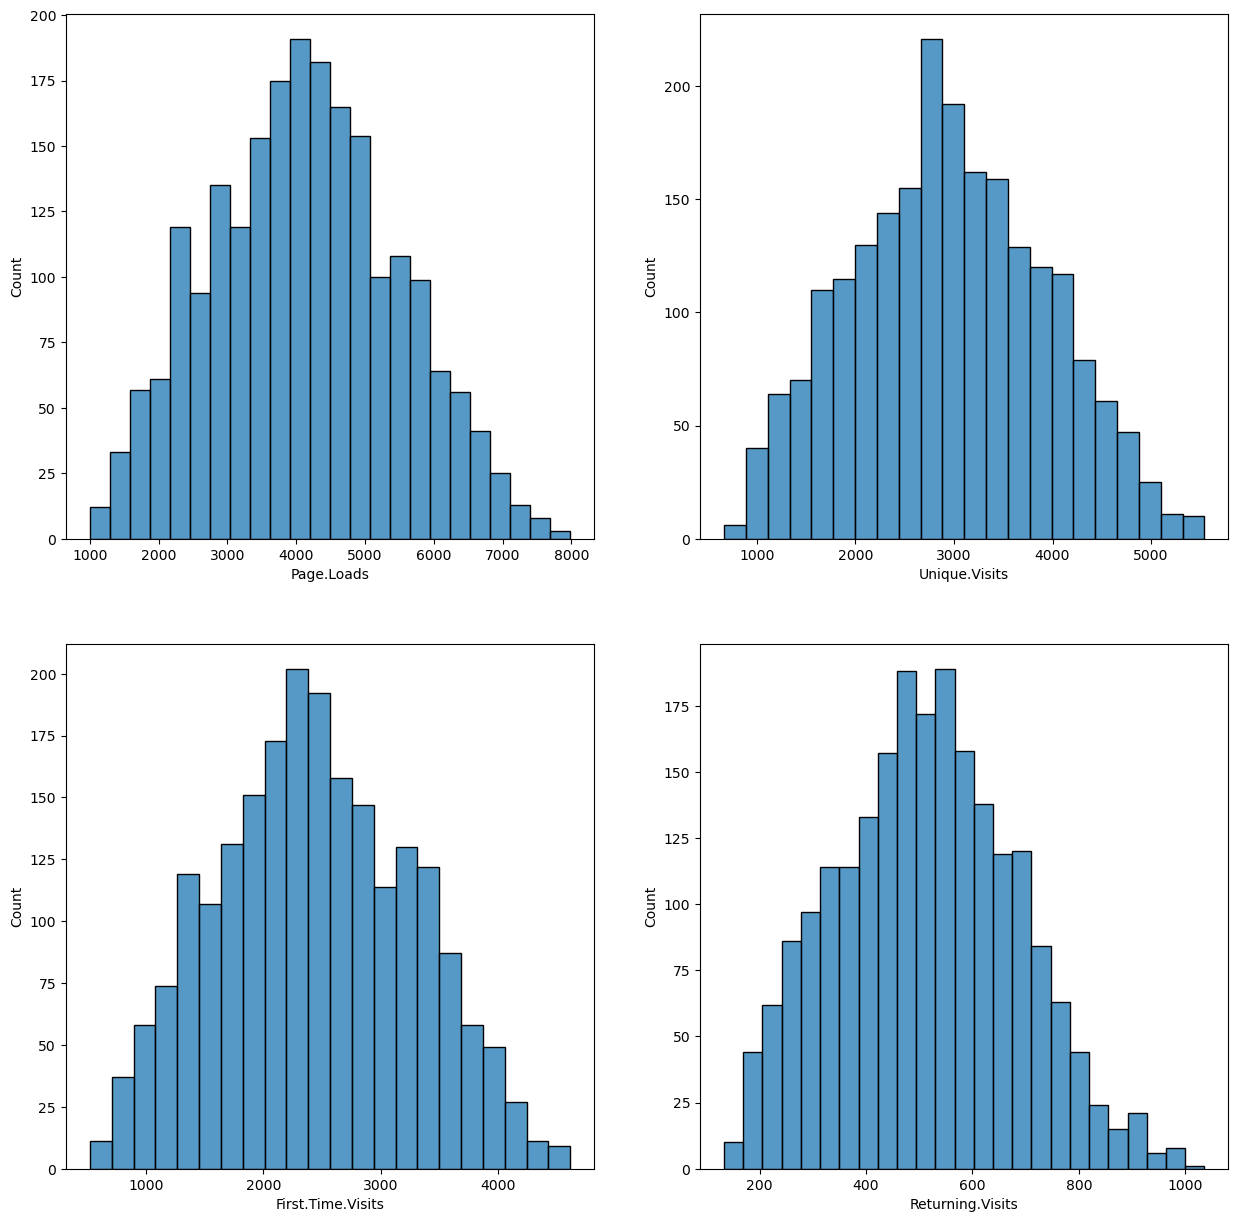

In [9]:
plot_values = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(plot_values):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=data, x=col)

In [10]:
day_data = data.groupby('Day')
avg_day_data = day_data.mean().reset_index().drop(['Row','Date'],axis=1)
avg_day_data

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Friday,6.0,3719.860841,2646.770227,2164.417476,482.352751
1,Monday,2.0,4845.680645,3458.425806,2858.180645,600.245161
2,Saturday,7.0,2501.025890,1786.747573,1477.181230,309.566343
3,Sunday,1.0,3246.980645,2341.270968,1949.025806,392.245161
4,Thursday,5.0,4651.355987,3327.553398,2747.317152,580.236246
5,Tuesday,3.0,4955.335484,3539.293548,2928.232258,611.061290
6,Wednesday,4.0,4893.916129,3502.012903,2895.490323,606.522581


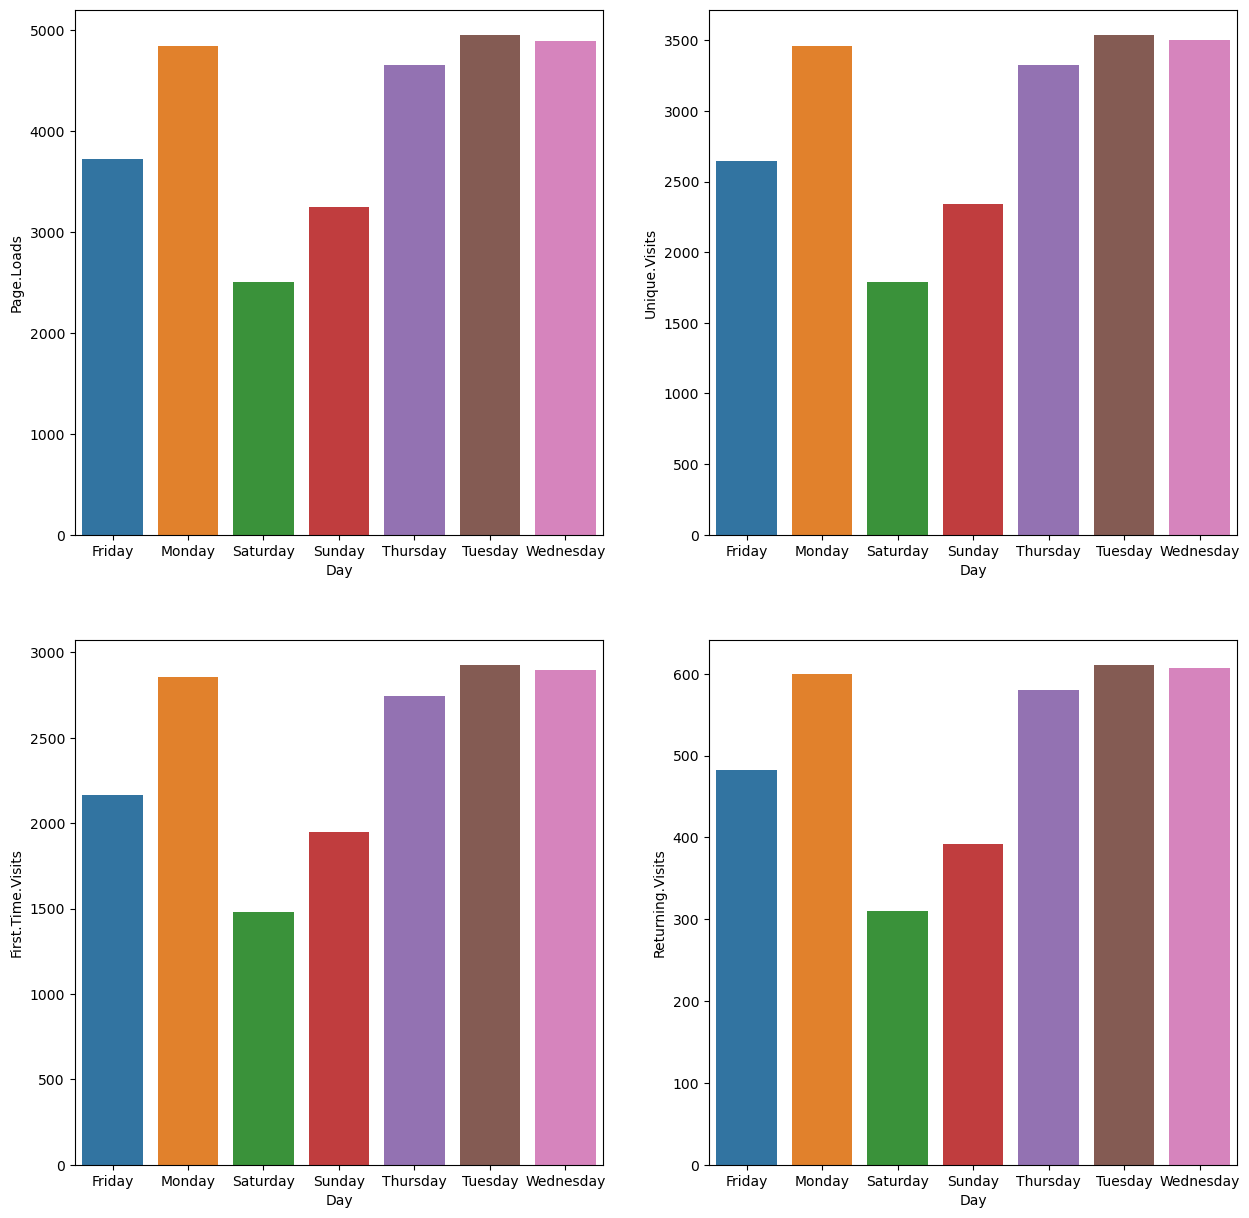

In [11]:
plot_values = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15,15))
for i, col in enumerate(plot_values):
    plt.subplot(2,2,i+1)
    sns.barplot(avg_day_data,x='Day',y=col)

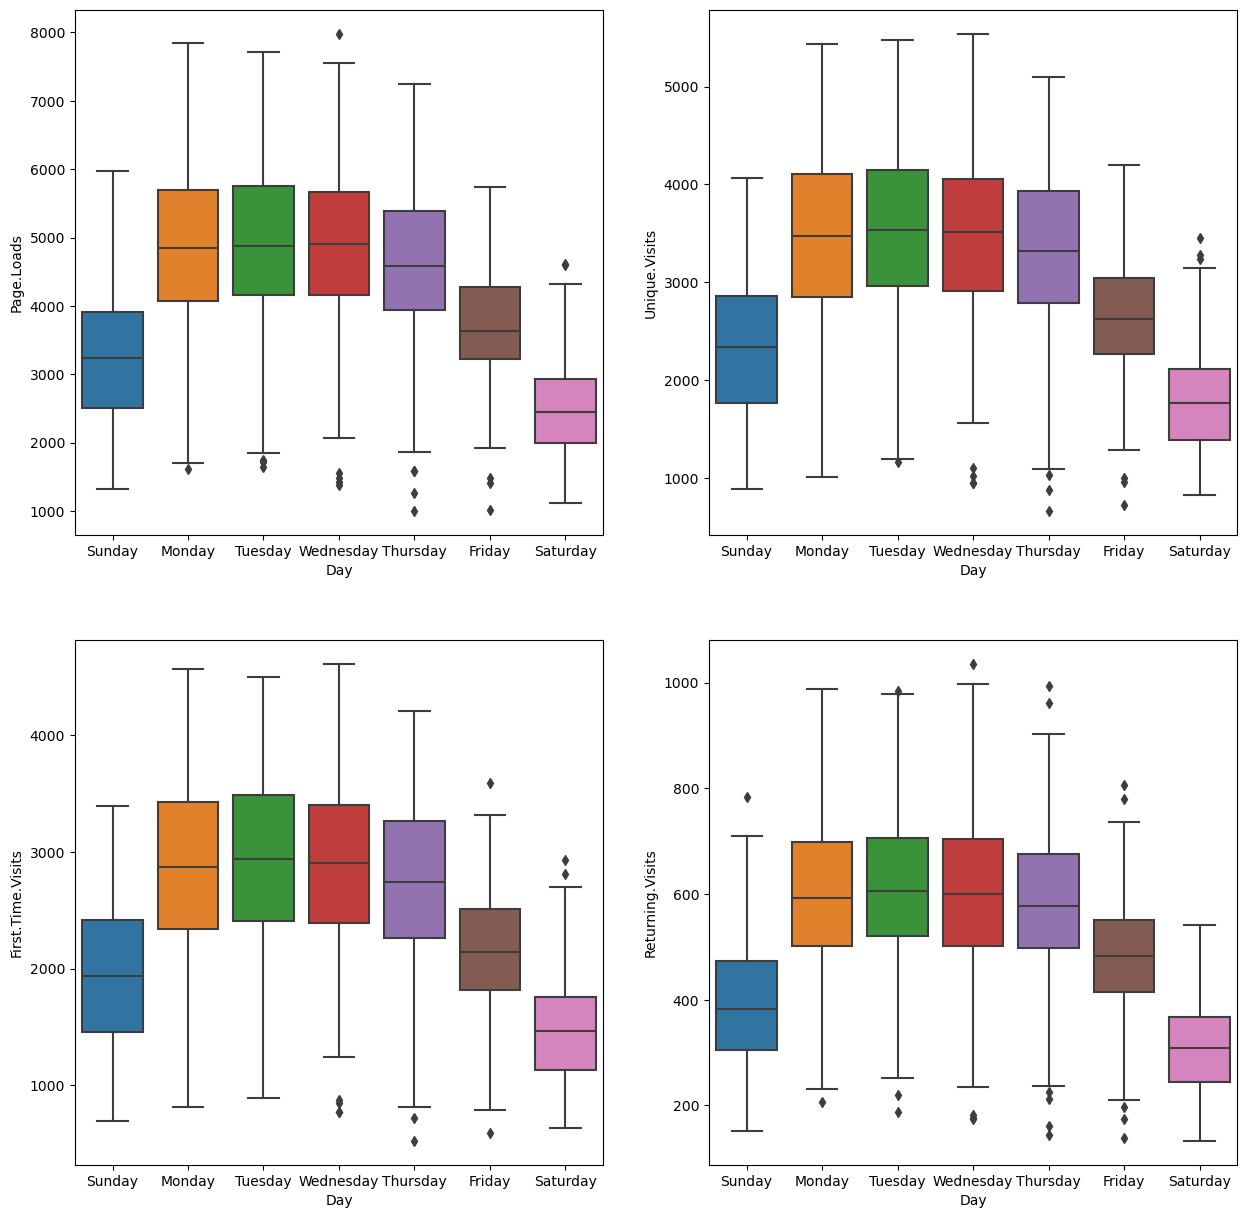

In [12]:
plt.figure(figsize=(15,15))
for i,col in enumerate(plot_values):
    plt.subplot(2,2,i+1)
    sns.boxplot(data,x='Day',y=col)

In [13]:
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cbar=False)

ValueError: could not convert string to float: 'Sunday'

In [14]:
#RFM
data['Date'].max()

Timestamp('2020-08-19 00:00:00')

In [17]:
latest_date=dt.datetime(2020, 8,19)
rfm=data.groupby('Row').agg({'Date': lambda date:(latest_date-date.max()).days,'Row': lambda n:len(n),'Page.Loads':lambda n:n.sum()})
rfm

,Date,Row,Page.Loads
Row,,,
1,2166,1,2146
2,2165,1,3621
3,2164,1,3698
4,2163,1,3667
5,2162,1,3316
...,...,...,...
2163,4,1,2221
2164,3,1,2724
2165,2,1,3456


In [18]:
rfm.columns= ['Recency','Frequency','Monetary']

,Recency,Frequency,Monetary
Row,,,
1,2166,1,2146
2,2165,1,3621
3,2164,1,3698
4,2163,1,3667
5,2162,1,3316
...,...,...,...
2163,4,1,2221
2164,3,1,2724
2165,2,1,3456


In [19]:
#saving files
data.to_csv('web_traffic_analysis.csv')
rfm.to_csv('web_tr_rfm.csv')